In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
%matplotlib inline

/Users/Edite/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data2 = pd.read_excel("Portfolio-Task-1-Data_Fresco.xlsx")

<AxesSubplot:>

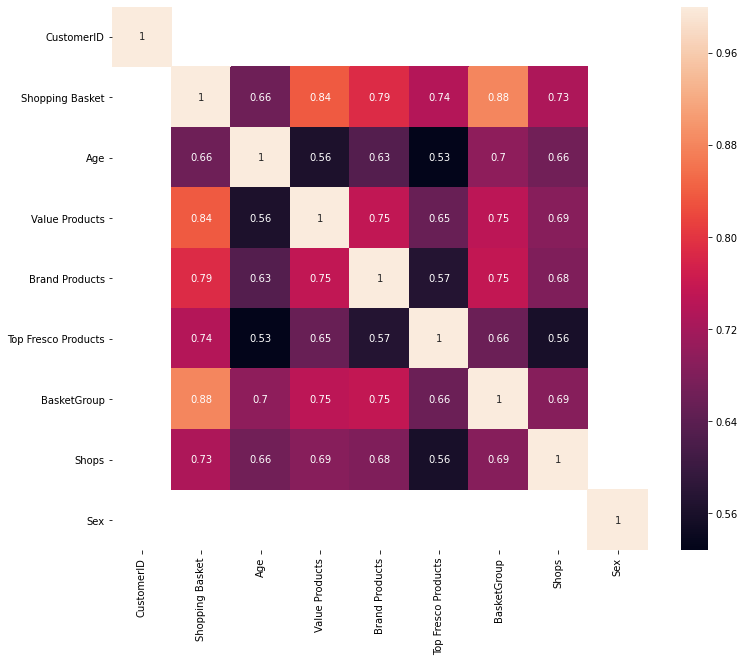

In [3]:
# calculate the correlation matrix, show only significant correlation
corr = data2.corr()

plt.figure(figsize=(12,10))
# plot the heatmap
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
        xticklabels=corr.columns,
        yticklabels=corr.columns
           ,annot=True)

In [4]:
data2.columns

Index(['CustomerID', 'Shopping Basket', 'Gender', 'Age', 'Store Type',
       'Value Products', 'Brand Products', 'Top Fresco Products',
       'BasketGroup', 'Shops', 'Sex'],
      dtype='object')

In [5]:
#split dataset in features and target variable
feature_cols = ['Age', 'Value Products', 'Brand Products', 'Top Fresco Products']
X = data2[feature_cols] # Features
y = data2.BasketGroup # Target variable

In [6]:
logreg = LogisticRegression()

In [7]:
logreg.fit(X,y)

#
y_pred=logreg.predict(X)

/Users/Edite/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
X['Top Fresco Products'].unique()

array([15,  4, 17,  1,  6,  3, 14,  9,  7,  2,  0, 12, 10, 19,  8, 21,  5,
       20, 11, 18, 13, 16, 22, -1])

In [10]:
data2.describe()

,CustomerID,Shopping Basket,Age,Value Products,Brand Products,Top Fresco Products,BasketGroup,Shops,Sex
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,7.712676,1.670909,38.640000,15.677333,8.628000,6.882667,2.137333,2.013333,0.520000
std,0.165313,0.360528,13.724974,12.313436,6.074879,5.206250,0.763708,0.739742,0.499933
min,7.308736,0.531479,19.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000
25%,7.560549,1.425043,25.000000,6.000000,4.000000,3.000000,2.000000,1.000000,0.000000
50%,7.718580,1.738701,38.000000,13.000000,8.000000,6.000000,2.000000,2.000000,1.000000
75%,7.865331,1.950532,49.000000,22.000000,13.000000,10.000000,3.000000,3.000000,1.000000
max,7.998549,2.240899,68.000000,52.000000,23.000000,22.000000,3.000000,3.000000,1.000000


In [11]:
data2.columns

Index(['CustomerID', 'Shopping Basket', 'Gender', 'Age', 'Store Type',
       'Value Products', 'Brand Products', 'Top Fresco Products',
       'BasketGroup', 'Shops', 'Sex'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelBinarizer
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(data2['Store Type'])
RaceA =pd.DataFrame(lb_results, columns=lb_style.classes_)
RaceA.head()

#Join results back to data frame
data = data2.join(RaceA)
data.head()

,CustomerID,Shopping Basket,Gender,Age,Store Type,Value Products,Brand Products,Top Fresco Products,BasketGroup,Shops,Sex,Convenient Stores,Online,Superstore
0,7.795930,1.960804,Male,41,Online,31,15,15,3,3,1,0,1,0
1,7.528741,1.807941,Female,37,Superstore,13,4,4,2,2,0,0,0,1
2,7.666459,1.884229,Female,64,Superstore,31,17,17,3,2,0,0,0,1
3,7.690072,1.771955,Female,48,Superstore,23,11,4,2,2,0,0,0,1
4,7.555585,1.065206,Male,19,Superstore,5,4,1,1,2,1,0,0,1


<AxesSubplot:>

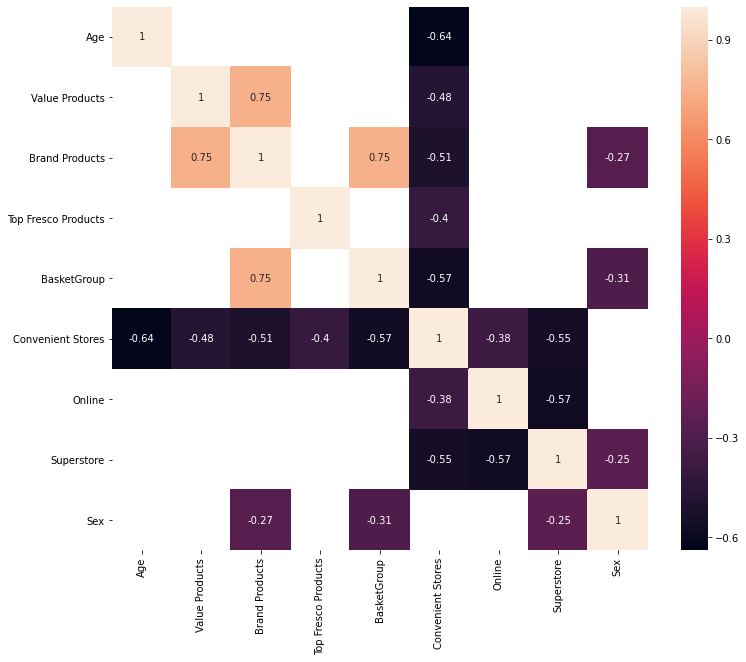

In [13]:
# calculate the correlation matrix, show only significant correlation

data_corr = data[['Age', 'Value Products', 'Brand Products', 'Top Fresco Products',
       'BasketGroup', 'Convenient Stores', 'Online', 'Superstore', 'Sex']]
corr = data_corr.corr()

plt.figure(figsize=(12,10))
# plot the heatmap
sns.heatmap(corr[(corr >= 0.75) | (corr <= -0.25)], 
        xticklabels=corr.columns,
        yticklabels=corr.columns
           ,annot=True)

In [14]:
data['Age'] = np.log10(data['Age'])
data['Value Products'] = np.log10(data['Value Products'])
data['Brand Products'] = np.log10(data['Brand Products'])
data['Top Fresco Products'] = np.log10(data['Top Fresco Products'])

/Users/Edite/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Edite/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

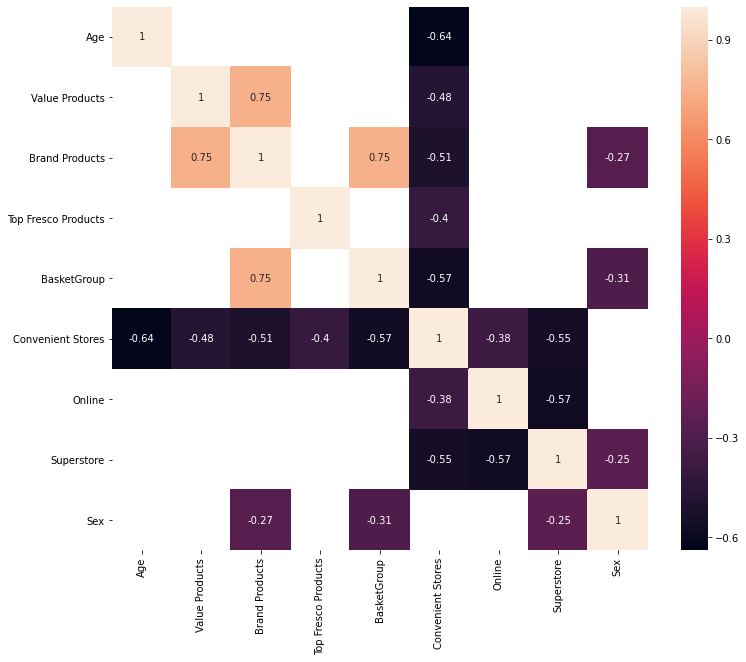

In [15]:
corr = data_corr.corr()

plt.figure(figsize=(12,10))
# plot the heatmap
sns.heatmap(corr[(corr >= 0.75) | (corr <= -0.25)], 
        xticklabels=corr.columns,
        yticklabels=corr.columns
           ,annot=True)

In [17]:
data['Value Products'].describe()

count    750.000000
mean           -inf
std             NaN
min            -inf
25%        0.778151
50%        1.113943
75%        1.342423
max        1.716003
Name: Value Products, dtype: float64

In [18]:
data.columns

Index(['CustomerID', 'Shopping Basket', 'Gender', 'Age', 'Store Type',
       'Value Products', 'Brand Products', 'Top Fresco Products',
       'BasketGroup', 'Shops', 'Sex', 'Convenient Stores', 'Online',
       'Superstore'],
      dtype='object')